# Lab 6 - LHC
## Problem 1

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

bkgd = stats.poisson.rvs(100, size =1000000)
print('Prob: ', stats.poisson.cdf(5, 100))

Prob:  3.261456366720447e-36


## Problem 2

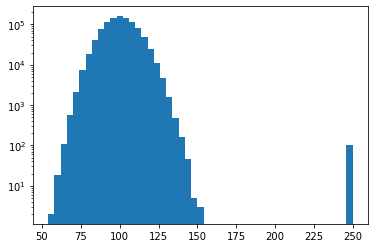

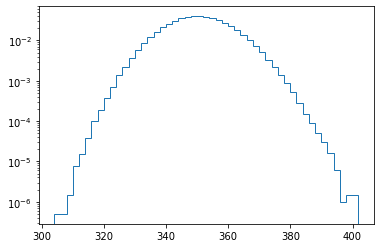

In [161]:
# Inject a signal

signal = 100 * [100 + 15 * np.std(bkgd)]  # +15 std-dev signal, 100 points
data = np.append(bkgd, signal)
plt.hist(data, bins = 49)
plt.yscale('log')
plt.show()

signal = 100 + 15 * np.std(bkgd)  # +15 std-dev signal, 100 points
data = bkgd + signal
plt.hist(data, bins = 49, histtype='step', density=True)
plt.yscale('log')
plt.show()

__A)__ The histogram appears to be Guassian with a mean of 100 plus several standard deviation signals. The observed signal does appear noticeable. The histogram is telling us the probability of finding a signal in a given background. In this case, the probability would only exist with a signal between 249.8 and 250. 

__B)__ The observed signal is biased because of its frequency and likely to be stronger than the true signal given the high sigma. The signal is symmetric.

## Problem 3

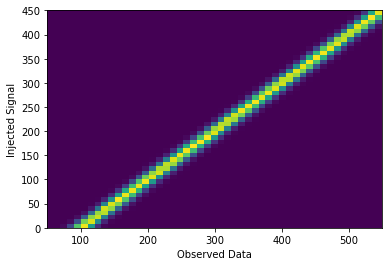

In [123]:
# Suite of signals

# Simulating the probability of detecting a signal with a given background

signal2 = stats.uniform.rvs(loc=0, scale=(100 + 35 * np.std(bkgd)), size=1000000)
data = bkgd + signal2

signaledges = np.linspace(0,450,50)
dataedges = np.linspace(50,550,50)

H, temp1, temp2, temp3 = plt.hist2d(data, signal2, bins=[dataedges,signaledges], density=True)
plt.xlabel('Observed Data')
plt.ylabel('Injected Signal')
plt.show()

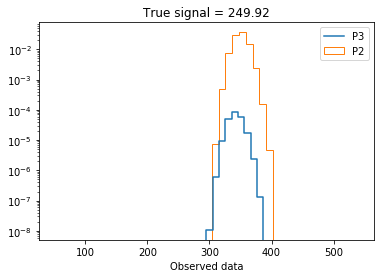

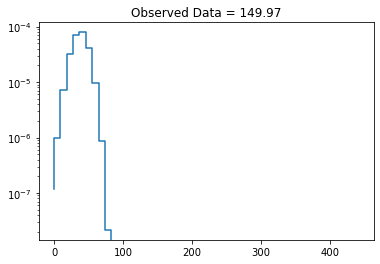

7.937296832025384e-05
1.3200566532691342e-48


In [164]:
# B) ###########################################################
# Take a slice of 2D hist and compare to 1D hist from Problem 2

# Get index of bin that contains signal
n1 = 0
for i in range(len(signaledges)):
    if signal - signaledges[i] > 0:
        n1 = i
        
yslice = H.T[n1]  # slice horizontal where Problem 2 signal is
plt.step(dataedges[:-1], yslice)
plt.hist(data, bins = 9, histtype='step', density=True)
plt.xlabel('Observed data')
plt.yscale('log')
title1 = 'True signal = ' + str(round(signal, 2))
plt.title(title1)
plt.legend(['P3','P2'])
plt.show()

# C) ###########################################################

observed = 100 + 5 * np.std(bkgd)

# Get index of bin that contains observed data
n2 = 0
for i in range(len(dataedges)):
    if observed - dataedges[i] > 0:
        n2 = i

xslice = H[n2]  # array in which observed value lies
plt.step(signaledges[:-1], xslice)
plt.yscale('log')
title2 = 'Observed Data = ' + str(round(observed, 2))
plt.title(title2)
plt.show()

# D) ###########################################################
# What is 1-sigma uncertainty on true signal strength
# Refer to lecture slide 13, page 12

peak = np.max(xslice)
print(peak)
upper = stats.poisson.cdf(1, 115)
print(upper)

The observed signal is symmetric but not biased because there is an even range of signal injections. 